<h1 style="text-align:center;">MICROSOFT MOVIE PRODUCTION STUDIO ANALYSIS</h1>

<div style="text-align:center;">
  <img src="Images/Movie Studio Image 3.jpg" alt="Microsoft Movie Studio Logo">
</div>

<h1 style="text-align:center;">OVERVIEW OF THE PROJECT</h1>

This Project investigates recent box office movies. Detailed analyses of various movie components such as genre, directorship, and income. The results reveal that the success and popularity of recent box office releases are notably influenced by choice of popular genres such as dramas, along with the quality of production by top directors and writers like Sam Mendes and Michael Showalter. Microsoft can utilize these insights to shape decisions for their upcoming movie studio, assisting in the selection of movies to produce.


<h1 style="text-align:center;">BUSINESS UNDERSTANDING</h1>


Microsoft Corporation has chosen to enter the profitable realm of filmmaking. Analyzing patterns in contemporary box office successes has to be undertaken to assist Microsoft in establishing a prosperous movie studio and producing successful films.

<h1 style="text-align:center;">DATA UNDERSTANDING</h1>
<h1 style="text-align:center;">Analyzing the Information Across Different Datasets</h1>



Data used was obtained from platforms such as Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB. These popular platforms provide information and data related to movies. SQLite was used to read data from IMDB which is inform of a database('im.bd'). Pandas is used to read data from the other platform which is inform of CSV and TSV files. Data from these platforms is used to understand market trends, audience preferences, critical reception, and financial performance of movies. Integrating data from these diverse sources offers a holistic perspective, offering valuable insights for making well-informed decisions within the film production industry.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading and reading the different Datasets for Analysis
BoxOfficeMojo = pd.read_csv('Data/bom.movie_gross.csv')
RT_Dataset = pd.read_csv('Data/rt.movie_info.tsv', sep = '\t')
TMDB_movies = pd.read_csv('Data/tmdb.movies.csv', index_col=0)
TheNumbers_movieBudgets = pd.read_csv('Data/tn.movie_budgets.csv', index_col=0)
RT_reviews = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding = 'windows-1252', index_col=0)

In [3]:
# Connect to the SQLite database file 'im.db' in the 'Data' folder
conn = sqlite3.connect('Data/im.db')
IM_DB = conn.cursor() #Create a cursor object to interact with the database


Box Office Mojo Dataset:

   Role: Focuses on box office revenue and financial performance of movies.
   Data Provided: Box office earnings, release dates, production budgets, and related financial information.
   Use Case: Useful for analyzing the commercial success of movies and understanding their financial performance.. 

In [4]:
# Display the first 10 rows of the DataFrame
BoxOfficeMojo.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [5]:
# Display summary information about the dataframe
BoxOfficeMojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The BoxOfficeMojo Dataset has 3387 rows and 5 columns. The various rows have missing values in different columns as we see above. The Data from this file is important as we can leverage it to analyse the various income streams for different types of movies.

In [6]:
# Display the first 5 rows of the dataframe
TheNumbers_movieBudgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
TheNumbers_movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


TheNumbers_movieBudgets Dataset(from 'The Numbers' Website) has 5782 rows and 5 columns and has data similar to the BoxOfficeMOjo Dataset of Gross income from movies. However, it has a crucial column of 'production_budget' which will help in analysis of Net Income by a movie.

In [8]:
RT_Dataset.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
RT_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The RT_Dataset(from 'Rotten Tomatoes' website) has 1560 rows and 12 columns. Rows from different columns have missing values or values which are NaN. The dataset has valuable data which can help in grouping movies by genres, rating and movie date.

In [10]:
RT_reviews.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
RT_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [12]:
TMDB_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
TMDB_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [14]:
# Execute an SQL query to retrieve the names of all tables in the SQLite database 'IM_DB'
IM_DB.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

IM_DB_tables = IM_DB.fetchall()
IM_DB_tables # Display all IMDB table names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [15]:
# Execute an SQL query to select all rows from the 'movie_ratings' table
IM_DB.execute("SELECT * FROM movie_ratings;")
results = IM_DB.fetchall() # Fetch all the results from the executed query and store them in the 'results' variable

# Create a DataFrame (df1) from the results obtained from the SQL query
# The columns are named based on the description from the executed query
df1 = pd.DataFrame(data=results, columns=[x[0] for x in IM_DB.description])
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:
# Execute an SQL query to select all rows from the 'movie_basics' table
IM_DB.execute("SELECT * FROM movie_basics;")
results = IM_DB.fetchall()

# Create a DataFrame (df2) from the results obtained from the SQL query
df2 = pd.DataFrame(data=results, columns=[x[0] for x in IM_DB.description])
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [17]:
# Close the connection to the SQLite database to free up resources
conn.close()


IM_DB Dataset (from Internet Movies Database website), TMDB Database(from The Movie Database website) and RT_reviews Dataset(Rotten Tomatoes reviews file) have columns which show Movie ratings which we can leverage in the data analysis of ratings of Movies based on genres.

<h1 style="text-align:center;"> DATA PREPARATION</h1>
<h1 style="text-align:center;">Processing for Data Analysis (Data Cleaning)</h1>


As we have seen in the Data Understanding Section, IM_DB Dataset, TMDB_movies Database have columns which show Movie ratings and genres. We can combine the relevant Datasets in this files to show popular movies based on ratings.

The two Rotten Tomato datasets "RT_Dataset" and "RT_reviews" were merged on "id" column. The merged Dataset "Merged_RT_data" was cleaned to help in Analysis of Ratings, Top Directors and Writers.

The BoxOfficeMojo Dataset and TheNumbers_movieBudgets Dataset can be combined to Analyse Movie Genres with the highest Net Income for the Business Model.

Combining IM_DB Dataset and TMDB_movies Database

    Checking the df1 and df2 Dataframes for missing values

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
merged_df = pd.merge(df1, df2, on='movie_id', how='left') # Merging df1 and df2 based on the 'movie_id' column
merged_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [22]:
# Merging TMDB_movies DataFrame and merged_df DataFrames
# Merge based on the 'original_title' column
MoviesDB_merged_df = pd.merge(TMDB_movies, merged_df, on='original_title', how='inner')
# Drop irrelevant columns
MoviesDB_merged_df = MoviesDB_merged_df.drop(['genre_ids', 'id', 'original_language', 'movie_id', 'primary_title'], axis=1)


MoviesDB_merged_df.head()

,original_title,popularity,release_date,title,vote_average,vote_count,averagerating,numvotes,start_year,runtime_minutes,genres
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,7.7,425530,2010,146.0,"Adventure,Fantasy,Mystery"
1,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,8.1,611299,2010,98.0,"Action,Adventure,Animation"
2,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,7.0,657690,2010,124.0,"Action,Adventure,Sci-Fi"
3,Inception,27.920,2010-07-16,Inception,8.3,22186,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
4,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,5.9,165108,2010,118.0,"Adventure,Family,Fantasy"


In [23]:
# Display the last 5 rows to check consistency of data
MoviesDB_merged_df.tail() # We can see 0.0 values in 'vote_average' column

,original_title,popularity,release_date,title,vote_average,vote_count,averagerating,numvotes,start_year,runtime_minutes,genres
17886,Closing Time,0.6,2018-02-24,Closing Time,0.0,1,6.4,51,2018,116.0,Documentary
17887,The Last One,0.6,2018-10-01,The Last One,0.0,1,6.1,15,2018,85.0,"Action,Adventure,Fantasy"
17888,The Last One,0.6,2018-10-01,The Last One,0.0,1,7.0,26,2014,80.0,"Documentary,History,News"
17889,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1,4.3,25,2016,79.0,Adventure
17890,The Church,0.6,2018-10-05,The Church,0.0,1,5.7,19,2018,81.0,"Horror,Thriller"


In [24]:
MoviesDB_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   17891 non-null  object 
 1   popularity       17891 non-null  float64
 2   release_date     17891 non-null  object 
 3   title            17891 non-null  object 
 4   vote_average     17891 non-null  float64
 5   vote_count       17891 non-null  int64  
 6   averagerating    17891 non-null  float64
 7   numvotes         17891 non-null  int64  
 8   start_year       17891 non-null  int64  
 9   runtime_minutes  17394 non-null  float64
 10  genres           17831 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [25]:
# Counting  the number of rows with 0.0 value in the 'vote_average' column
zero_vote_average_count = MoviesDB_merged_df[MoviesDB_merged_df['vote_average'] == 0.0].shape[0]
print("Number of rows with 0.0 value in 'vote_average' column:", zero_vote_average_count)

Number of rows with 0.0 value in 'vote_average' column: 90


In [26]:
# Drop rows with 0.0 value in 'vote_average' column
MoviesDB_merged_df = MoviesDB_merged_df[MoviesDB_merged_df['vote_average'] != 0.0]

In [27]:
# Extract the year from the 'release_date' column
MoviesDB_merged_df['release_year'] = pd.to_datetime(MoviesDB_merged_df['release_date']).dt.year
# Count the number of rows where 'start_year' is equal to 'release_year'
Matching_years_count = MoviesDB_merged_df[MoviesDB_merged_df['start_year'] == MoviesDB_merged_df['release_year']].shape[0]

print("Number of rows with similar years in 'start_year' and 'release_date' columns:", Matching_years_count)

Number of rows with similar years in 'start_year' and 'release_date' columns: 11890


In [28]:
# Find rows without matching years
Non_matching_rows = MoviesDB_merged_df[MoviesDB_merged_df['start_year'] != MoviesDB_merged_df['release_year']]

print("Number of rows without matching years:", len(Non_matching_rows))

# Drop the non-matching rows
MoviesDB_merged_df = MoviesDB_merged_df[MoviesDB_merged_df['start_year'] == MoviesDB_merged_df['release_year']]

Number of rows without matching years: 5911


In [29]:
# Drop the 'start_year' and 'release_date' columns and keep the 'release_year' column that was created
MoviesDB_merged_df = MoviesDB_merged_df.drop(['start_year', 'release_date'], axis=1)
MoviesDB_merged_df.head()

,original_title,popularity,title,vote_average,vote_count,averagerating,numvotes,runtime_minutes,genres,release_year
0,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,7.7,425530,146.0,"Adventure,Fantasy,Mystery",2010
1,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,8.1,611299,98.0,"Action,Adventure,Animation",2010
2,Iron Man 2,28.515,Iron Man 2,6.8,12368,7.0,657690,124.0,"Action,Adventure,Sci-Fi",2010
3,Inception,27.920,Inception,8.3,22186,8.8,1841066,148.0,"Action,Adventure,Sci-Fi",2010
4,Percy Jackson & the Olympians: The Lightning T...,26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,5.9,165108,118.0,"Adventure,Family,Fantasy",2010


In [30]:
MoviesDB_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11890 entries, 0 to 17883
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   11890 non-null  object 
 1   popularity       11890 non-null  float64
 2   title            11890 non-null  object 
 3   vote_average     11890 non-null  float64
 4   vote_count       11890 non-null  int64  
 5   averagerating    11890 non-null  float64
 6   numvotes         11890 non-null  int64  
 7   runtime_minutes  11694 non-null  float64
 8   genres           11858 non-null  object 
 9   release_year     11890 non-null  int32  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 975.4+ KB


In [31]:
# Calculate the mean of 'vote_average' and 'averagerating' columns
MoviesDB_merged_df['movie_rating'] = MoviesDB_merged_df[['vote_average', 'averagerating']].mean(axis=1)

# Create a new column 'movie_rating''
MoviesDB_merged_df.head()

,original_title,popularity,title,vote_average,vote_count,averagerating,numvotes,runtime_minutes,genres,release_year,movie_rating
0,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,7.7,425530,146.0,"Adventure,Fantasy,Mystery",2010,7.70
1,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,8.1,611299,98.0,"Action,Adventure,Animation",2010,7.90
2,Iron Man 2,28.515,Iron Man 2,6.8,12368,7.0,657690,124.0,"Action,Adventure,Sci-Fi",2010,6.90
3,Inception,27.920,Inception,8.3,22186,8.8,1841066,148.0,"Action,Adventure,Sci-Fi",2010,8.55
4,Percy Jackson & the Olympians: The Lightning T...,26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,5.9,165108,118.0,"Adventure,Family,Fantasy",2010,6.00


In [32]:
MoviesDB_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11890 entries, 0 to 17883
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   11890 non-null  object 
 1   popularity       11890 non-null  float64
 2   title            11890 non-null  object 
 3   vote_average     11890 non-null  float64
 4   vote_count       11890 non-null  int64  
 5   averagerating    11890 non-null  float64
 6   numvotes         11890 non-null  int64  
 7   runtime_minutes  11694 non-null  float64
 8   genres           11858 non-null  object 
 9   release_year     11890 non-null  int32  
 10  movie_rating     11890 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 1.0+ MB


Cleaning of Merged_RT_data" which is a combined Dataset "RT_Dataset" and "RT_reviews" of to help in Analysis of Ratings, Top Directors and Writers.

In [33]:
Merged_RT_data = pd.merge(RT_Dataset, RT_reviews, on='id', how='inner')
Merged_RT_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [34]:
Merged_RT_data.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [35]:
#List of columns to be dropped
columns_to_drop = ['synopsis', 'rating_x', 'dvd_date', 'currency', 'box_office', 'review', 'publisher']
# Drop the specified columns
Merged_RT_data = Merged_RT_data.drop(columns=columns_to_drop)
Merged_RT_data.head()

,id,genre,director,writer,theater_date,runtime,studio,rating_y,fresh,critic,top_critic,date
0,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,3/5,fresh,PJ Nabarro,0,"November 10, 2018"
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,NaN,rotten,Annalee Newitz,0,"May 23, 2018"
2,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,NaN,fresh,Sean Axmaker,0,"January 4, 2018"
3,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,NaN,fresh,Daniel Kasman,0,"November 16, 2017"
4,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,NaN,fresh,NaN,0,"October 12, 2017"


In [36]:
# Drop rows with null values in the 'rating_y' column
Merged_RT_data = Merged_RT_data.dropna(subset=['rating_y'])
Merged_RT_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40915 entries, 0 to 54431
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40915 non-null  int64 
 1   genre         40839 non-null  object
 2   director      36700 non-null  object
 3   writer        33931 non-null  object
 4   theater_date  40015 non-null  object
 5   runtime       40297 non-null  object
 6   studio        30040 non-null  object
 7   rating_y      40915 non-null  object
 8   fresh         40915 non-null  object
 9   critic        38935 non-null  object
 10  top_critic    40915 non-null  int64 
 11  date          40915 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.1+ MB


Combining the "BoxOfficeMojo" and "TheNumbers_movieBudget" Datasets to create a merged "MoviesBudgets_data" Dataset. The "MoviesBudget Dataset" is then cleaned for Data Analysis.


In [37]:
# Combine on 'title' in BoxOfficeMojo and 'movie' in TheNumbers_movieBudgets
MoviesBudgets_data = pd.merge(BoxOfficeMojo, TheNumbers_movieBudgets, left_on='title', right_on='movie', how='inner')

MoviesBudgets_data.head()

,title,studio,domestic_gross_x,foreign_gross,year,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [38]:
# Drop specified columns
MoviesBudgets_data = MoviesBudgets_data.drop(['domestic_gross_x', 'foreign_gross'], axis=1)
MoviesBudgets_data.head()

,title,studio,year,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,2010,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,2010,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,2010,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,2010,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,2010,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [39]:
MoviesBudgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1247 non-null   object
 1   studio             1246 non-null   object
 2   year               1247 non-null   int64 
 3   release_date       1247 non-null   object
 4   movie              1247 non-null   object
 5   production_budget  1247 non-null   object
 6   domestic_gross_y   1247 non-null   object
 7   worldwide_gross    1247 non-null   object
dtypes: int64(1), object(7)
memory usage: 78.1+ KB


<h1 style="text-align:center;"> DATA ANALYSIS</h1>


In [40]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


%matplotlib inline

# 1. Most Popular Movies with high Ratings

The most popular movie genre according to IMBD (Internet Movie Database) and The Movie Database (TMDB) websites ratings were the Documentary movies. 

Top 10 Most Common Genres with High Ratings:
Documentary, 
Drama,
Biography,
Comedy,
Adventure,
History,
Music,
Thriller,
Sport,
Family.

In [41]:
# Filter movies with a rating of 8 and above
Highly_rated_movies = MoviesDB_merged_df[MoviesDB_merged_df['movie_rating'] >= 8]
# Count the occurrences of each genre
genre_counts = Highly_rated_movies['genres'].str.split(',').explode().str.strip().value_counts()
# Get the genre with the highest count
most_common_genre = genre_counts.idxmax()

print(f"The most Popular genre in movies with ratings above 8 is: {most_common_genre}")
# Get the top 10 most common genres
Top_10_most_genres = genre_counts.head(10)

The most Popular genre in movies with ratings above 8 is: Documentary


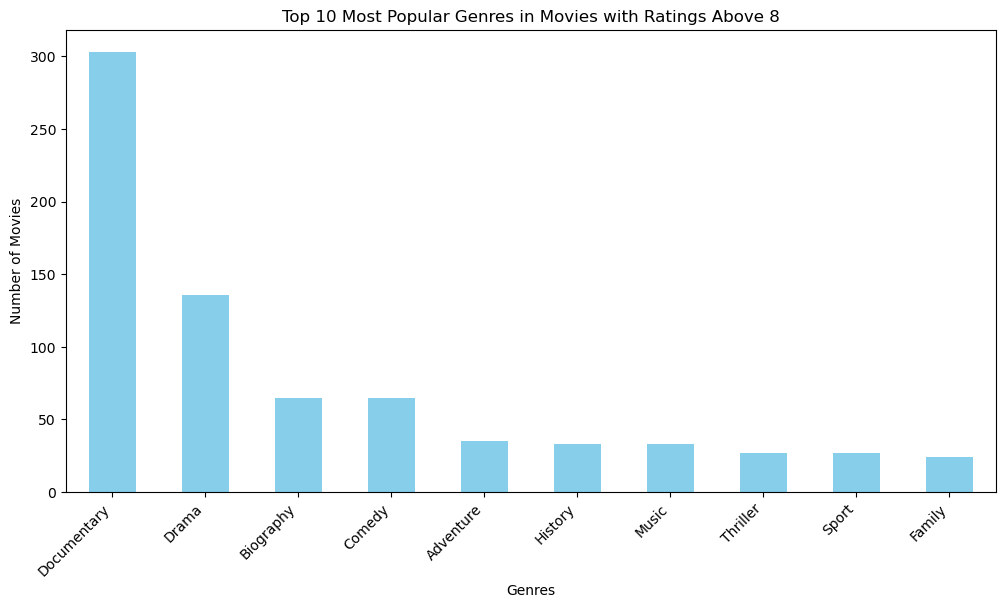

In [42]:
# Filter movies with a rating of 8 and above
# Create a Series with the Top 10 common genres
Top_10_genres = pd.Series(Top_10_most_genres)


# Plot the bar chart
plt.figure(figsize=(12, 6))
Top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Genres in Movies with Ratings Above 8')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

plt.show()

## 2. Top Directors and Writers of Movies

The Top Directors of Movies in Recent times (According to Rotten Tomatoes Movie Website) are:

Alexander Payne               ,
Derek Cianfrance              ,
Sam Mendes                    ,
Clint Eastwood                ,
Greg Berlanti                 ,
Morten Tyldum                 ,
Michael Showalter             ,
Andrew Stanton|Mark Atkins    ,
Sacha Gervasi                 ,
Ava DuVernay.
   

In [43]:
# Convert 'rating_y' column to numeric
Merged_RT_data['rating_y'] = pd.to_numeric(Merged_RT_data['rating_y'], errors='coerce')

# Filter movies with ratings of 4/5 and above
Highest_rated_movies = Merged_RT_data[Merged_RT_data['rating_y'] >= 4]

# Count the occurrences of each director in hihly rated movies
Director_counts = Highest_rated_movies['director'].value_counts()

# Get the top 10 directors with the most movies
Top_10_directors = Director_counts.head(10)

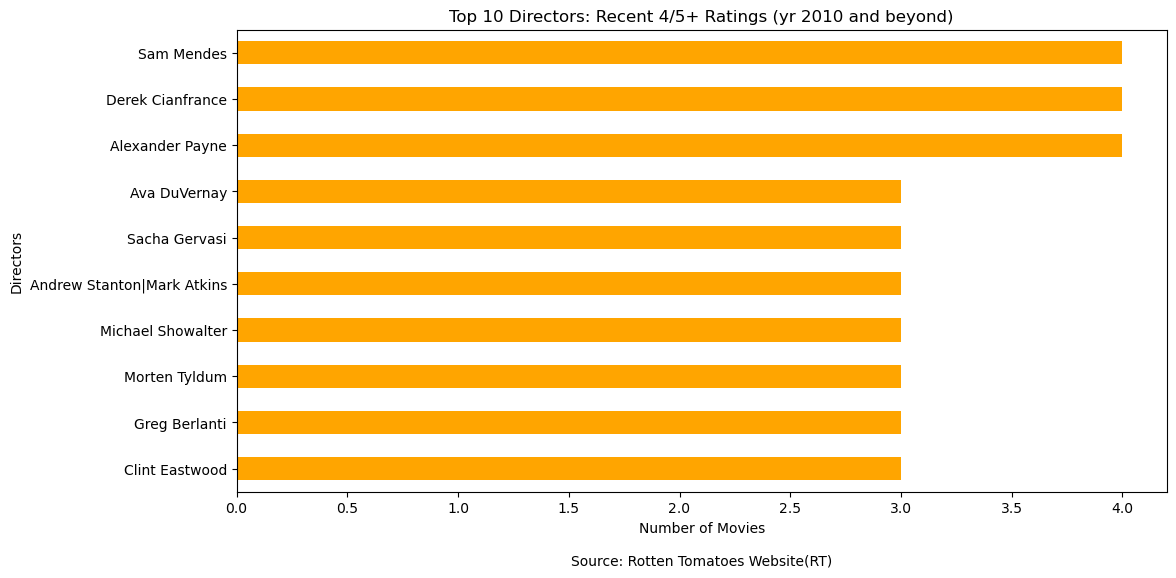

In [44]:
# Convert 'theater_date' column to datetime format
Merged_RT_data['theater_date'] = pd.to_datetime(Merged_RT_data['theater_date'], format='%b %d, %Y', errors='coerce')
# Filter movies released in the years 2010 and above
Recent_movies = Merged_RT_data[Merged_RT_data['theater_date'].dt.year >= 2010]
# Filter movies with ratings of 4/5 and above
High_rated_recent_movies = Recent_movies[Recent_movies['rating_y'] >= 4]
# Count the occurrences of each director
Director_counts_recent = High_rated_recent_movies['director'].value_counts()
# Get the top 10 directors with the most movies
Top_10_directors_recent = Director_counts_recent.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
Top_10_directors_recent.sort_values().plot(kind='barh', color='Orange')
plt.title('Top 10 Directors: Recent 4/5+ Ratings (yr 2010 and beyond)')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')

plt.text(0.5, -0.15, 'Source: Rotten Tomatoes Website(RT)', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

The Top Writers of Movies in Recent times(According to Rotten Tomatoes Movie Website) are:

Bob Nelson                                                             ,
Derek Cianfrance                                                       ,
John Logan,
Steven Baigelman   ,
Peter Morgan                                                           ,
Graham Moore                                                           ,
Michael Showalter                                        ,
Mark Atkins                ,
Paul Webb                                                             .


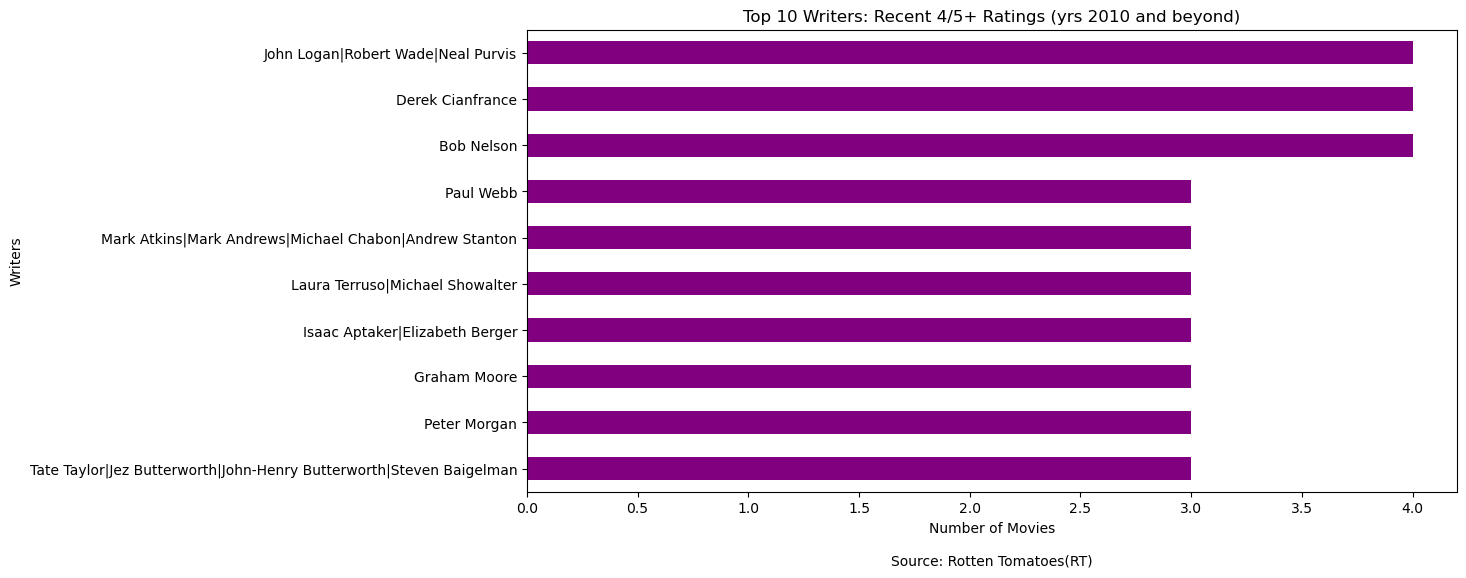

In [45]:
Merged_RT_data['theater_date'] = pd.to_datetime(Merged_RT_data['theater_date'], format='%b %d, %Y', errors='coerce')
# Filter movies released in the years 2010 and above
Recent_movies = Merged_RT_data[Merged_RT_data['theater_date'].dt.year >= 2010]
# Filter movies with ratings of 4/5 and above
High_rated_recent_movies = Recent_movies[Recent_movies['rating_y'] >= 4]
# Count the occurrences of each writer
Writers_counts_recent = High_rated_recent_movies['writer'].value_counts()
# Get the top 10 writers with the most movies
Top_10_writers_recent = Writers_counts_recent.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
Top_10_writers_recent.sort_values().plot(kind='barh', color='Purple')
plt.title('Top 10 Writers: Recent 4/5+ Ratings (yrs 2010 and beyond)')
plt.xlabel('Number of Movies')
plt.ylabel('Writers')

plt.text(0.5, -0.15, 'Source: Rotten Tomatoes(RT)', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

## 3. Movies Gross Income and Recent Movie Income Trends 

The Top Worldwide Grossing Movies in Recent times(According to Box Office Mojo & The Numbers Movie Website) are:

Avengers: Infinity War                                                             ,
Jurassic World                                                       ,
Furious 7,
Black Panther   ,
Jurassic World: Fallen Kingdom                                                           ,
Frozen                                                           ,
Avengers: Age of Ultron                                        ,
Incredibles 2                ,
Iron Man 3                                                             .


The Genre of the Top Grossing Movies in Recent times is mostly Drama and Thriller Movies

In [46]:
# Convert currency columns to numeric types
MoviesBudgets_data['production_budget'] = pd.to_numeric(MoviesBudgets_data['production_budget'].str.replace('[\$,]', '', regex=True), errors='coerce')
MoviesBudgets_data['domestic_gross_y'] = pd.to_numeric(MoviesBudgets_data['domestic_gross_y'].str.replace('[\$,]', '', regex=True), errors='coerce')
MoviesBudgets_data['worldwide_gross'] = pd.to_numeric(MoviesBudgets_data['worldwide_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Create the net income column
MoviesBudgets_data['net_income'] = MoviesBudgets_data['worldwide_gross'] - MoviesBudgets_data['production_budget']


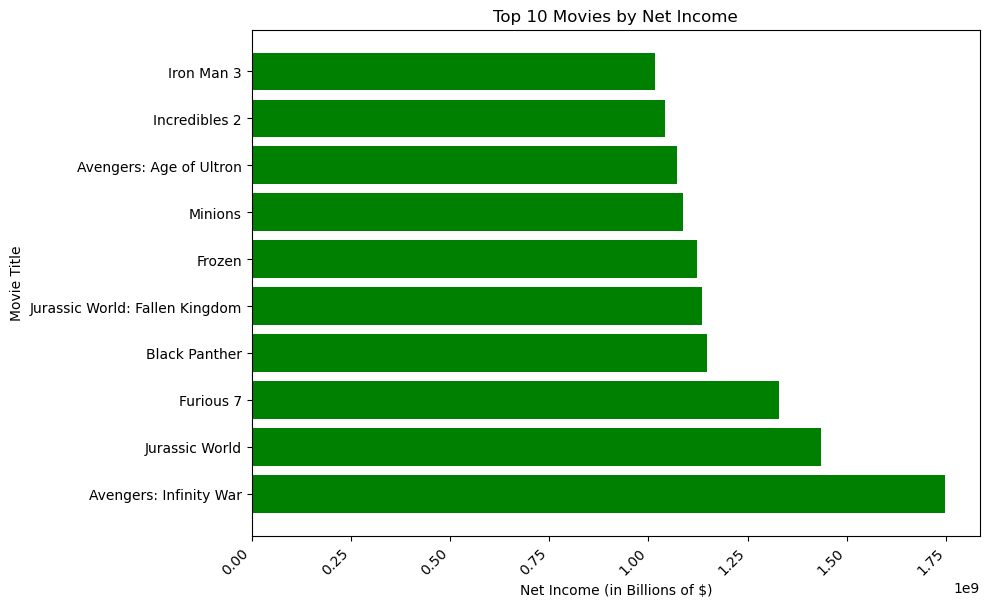

In [47]:
#Sort the DataFrame by net income in descending order
top_10NetIncome_movies = MoviesBudgets_data.sort_values(by='net_income', ascending=False).head(10)

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10NetIncome_movies['title'], top_10NetIncome_movies['net_income'], color='green')
plt.xlabel('Net Income (in Billions of $)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Net Income')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

The Recent Trends, according to The Box Office Mojo & The Numbers Movie Website, show increase in Net Income from Movies with a Rising Net Income of over $1 Billion from the year 2010 to 2018.

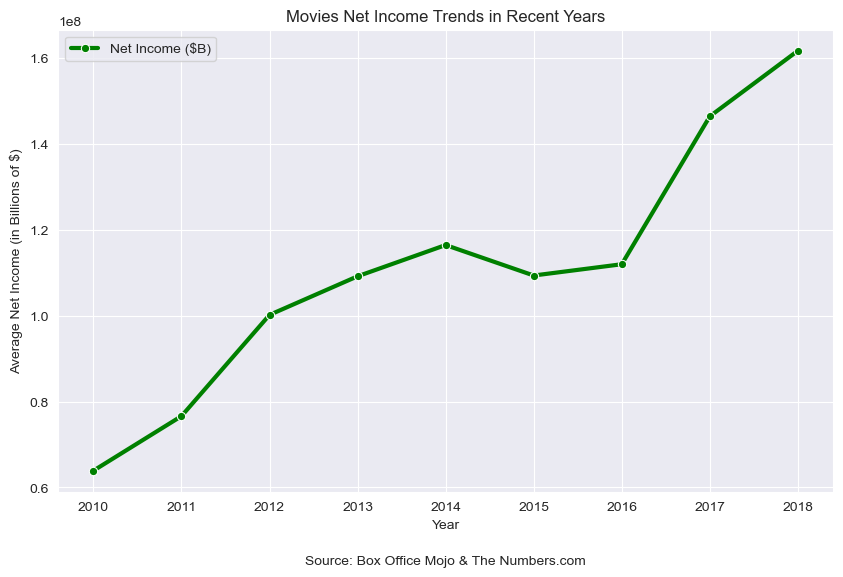

In [48]:
# Convert 'year' column to datetime format
MoviesBudgets_data['year'] = pd.to_datetime(MoviesBudgets_data['year'], format='%Y')

# Group by year and calculate the mean of net_income for each year
net_income_trends = MoviesBudgets_data.groupby(MoviesBudgets_data['year'].dt.year)['net_income'].mean().reset_index()

# Plotting the trend over the years
# setting a style for plots
sns.set_palette("Spectral")
sns.color_palette("Accent")
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='net_income', data=net_income_trends, marker='o', color='g',linewidth=3, label='Net Income ($B)')
plt.title('Movies Net Income Trends in Recent Years')
plt.xlabel('Year')
plt.ylabel('Average Net Income (in Billions of $)')
plt.grid(True)

plt.text(0.5, -0.15, 'Source: Box Office Mojo & The Numbers.com', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

<h1 style="text-align:center;">CONCLUSIONS</h1>





This analysis leads to three Business insights for Microsoft's plans to venture into ShowBiz and the Movie Production Industry. new movie studio.

- The most popular movie genre according to IMBD (Internet Movie Database) and The Movie Database (TMDB) websites ratings were the Documentary movies. Popular movie genres which attained high ratings among movie audiences were Documentary, Drama, Biography, Comedy, Adventure, History, Music, Thriller, Sport and Family Movies.

- The Top Movie Directors in recent times such as Alexander Payne, Derek Cianfrance, Sam Mendes and Clint Eastwood were outlined in the findings. Additionally, Top Writers of Movies in Recent times such as Bob Nelson, Derek Cianfrance, Steven Baigelman, and Michael Showalter were also identified.

- The Recent Trends, according to The Box Office Mojo & The Numbers Movie Website, show an increase in Worldwide Gross and Net Income from Movies. Additionaly, the numbers show the genres of Drama and Thriller Movies as the genres with highest incomes. 


<h1 style="text-align:center;">RECOMMENDATIONS</h1>


- **First and foremost, I recommend Microsoft to explore investment opportunities in the highly popular genres of Documentary, Drama, Biography, Comedy, Adventure, History, Music, Thriller, Sport and Family Movies, as they show significant potential.**

- **I would also recommend Microsoft to consider engaging the top-tier Directors such as Sam Mendes and writers such as Michael Showalter to enhance the quality of their movie productions.**

- **Opting to invest in the creation of high-quality, meticulously crafted films could prove to be a strategic and lucrative business move for Microsoft Corporation as recent trends indicate growing revenues for the Box office industry.**

<h1 style="text-align:center;">Next Steps</h1>


- **Further analysis and more recent datasets will help in making better insights and recommendations for Microsoft's Movie Production Venture.**

- **Incorporating web scraping for current movie data and data modelling to produce predictions of business models.** 

<div style="text-align:center;">
  <img src="Images/Movie Studio Image 2.jpg" alt="Microsoft Movie Studio Logo">
</div>